In [81]:
import os
import sys
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import collections
import pandas as pd

if sys.version_info[0] == 2:
    import xml.etree.cElementTree as ET
else:
    import xml.etree.ElementTree as ET

In [82]:
year = '2007'
dataType = 'train'

img_path = 'voc/VOC{}/JPEGImages'.format(year)
ann_path = 'voc/VOC{}/Annotations'.format(year)
split_path = 'voc/VOC{}/ImageSets/Main'.format(year)

In [83]:
split_list = os.listdir(split_path)

split_type = []
file_names = []

type_file = dataType + '.txt'

with open(os.path.join(split_path,type_file),'r') as f:
    file_names = [x.strip() for x in f.readlines()]        

img = [os.path.join(img_path,x + '.jpg') for x in file_names]
ann = [os.path.join(ann_path,x + '.xml') for x in file_names]

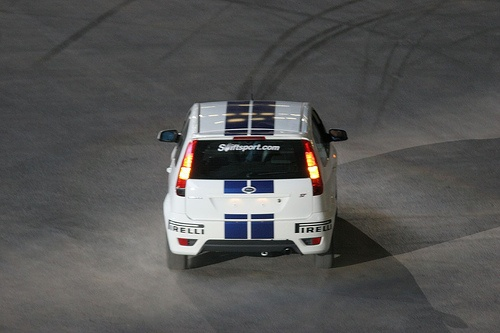

In [84]:
Image.open(img[0])

In [90]:
def parse_voc_xml(node):
    voc_dict = {}
    children = list(node)
    if children:
        def_dic = collections.defaultdict(list)
        for dc in map(parse_voc_xml, children):
            for ind, v in dc.items():
                def_dic[ind].append(v)
        voc_dict = {
            node.tag:
                {ind: v[0] if len(v) == 1 else v
                 for ind, v in def_dic.items()}
        }
    if node.text:
        text = node.text.strip()
        if not children:
            voc_dict[node.tag] = text
    return voc_dict


In [124]:
%matplotlib inline
def voc_show(img_path,xml_path):
    img = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    
    xml = open(xml_path)
    tree = ET.parse(xml)
    root = tree.getroot()
    
    size = root.find("size")
    
    width = size.find("width").text
    height = size.find("height").text
    channels = size.find("depth").text
    
    objects = root.findall("object")
    
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
    
        draw.rectangle(((xmin, ymin), (xmax, ymax)), outline="red")
        draw.text((xmin, ymin), name)
    
    plt.figure(figsize=(25,20))
    plt.imshow(img)
    plt.show()
    plt.close()

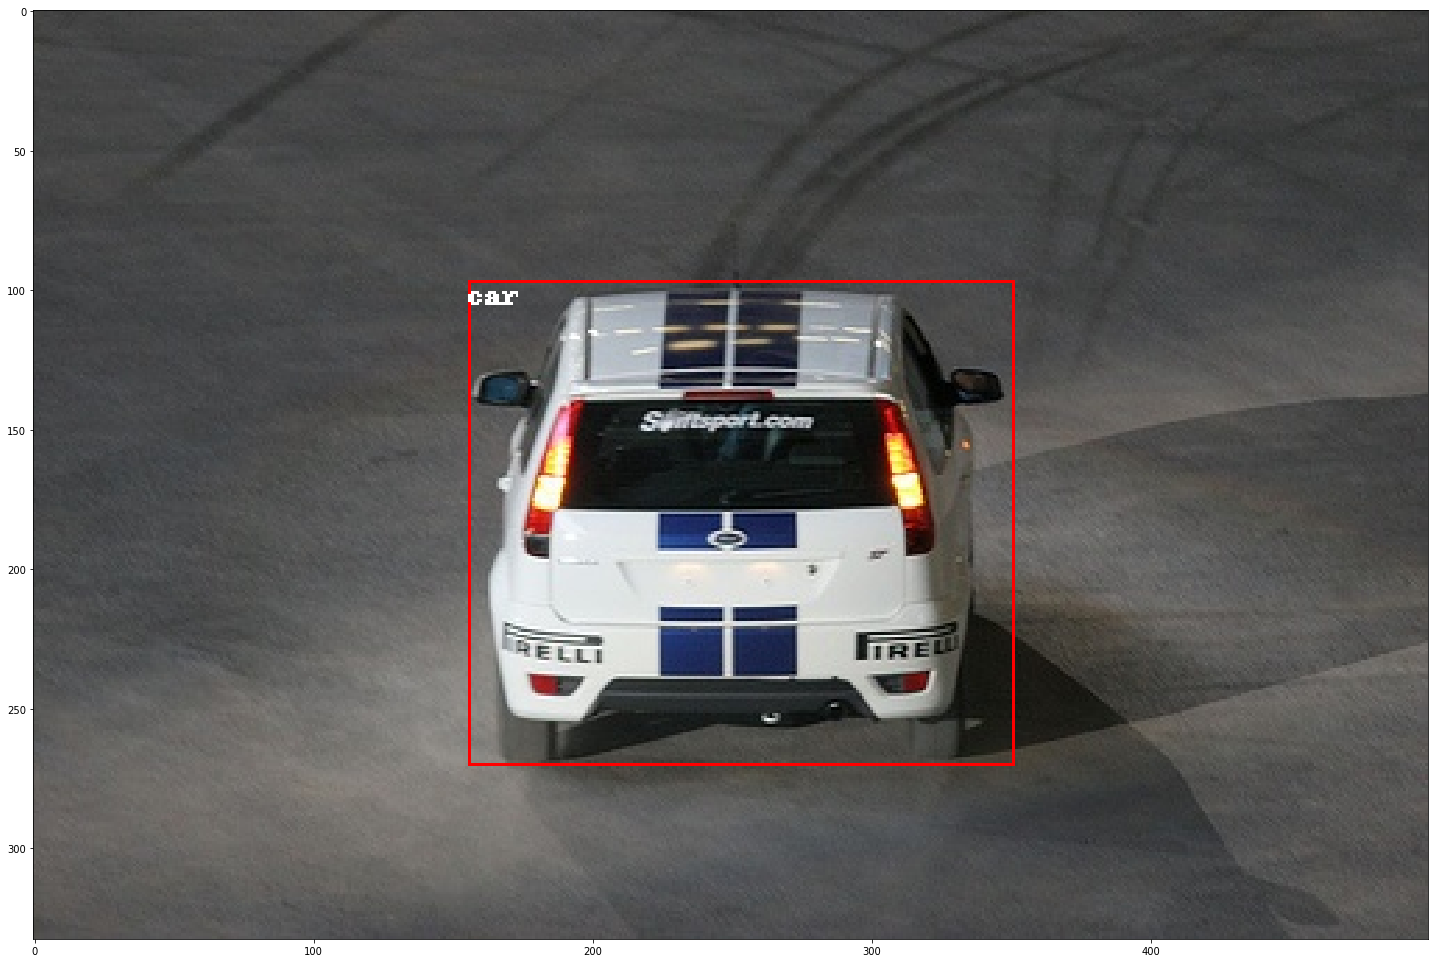

Counter({'car': 1})

In [123]:
counter = voc_show(img[0],ann[0])

In [125]:
counter = []

for xml_path in ann:
    xml = open(xml_path)
    tree = ET.parse(xml)
    root = tree.getroot()
        
    objects = root.findall("object")
    
    for _object in objects:
            name = _object.find("name").text
            
            counter.append(name)

In [130]:
counter = collections.Counter(counter)

In [133]:
df = pd.DataFrame(counter.values(),index=counter.keys(),columns=['num'])
print(df)

              num
cow           185
motorbike     193
sheep         191
bus           131
dog           271
person       2705
pottedplant   305
sofa          218
bicycle       202
diningtable   148
train         158
aeroplane     156
chair         726
horse         207
tvmonitor     191
boat          208
car           826
bird          294
bottle        338
cat           191


In [134]:
print('total image num : ',df['num'].sum())

total image num :  7844


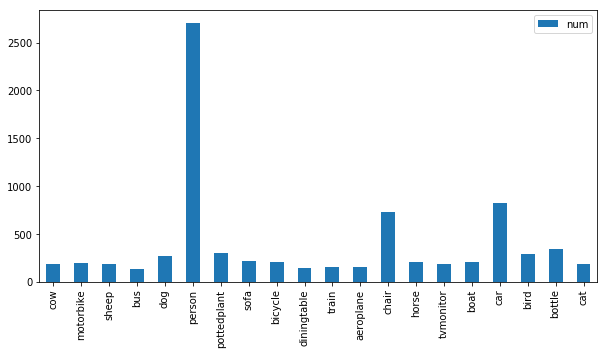

In [132]:
df.plot(kind='bar',figsize=(10,5))